# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
style.use('ggplot')

In [70]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


Basic Regression Diangnostics
------------------------------
Slope: 0.56
Y-intercept: 6.32
R-squared: 0.9715151515151514
------------------------------
Model: Y = 0.56 * x + 6.32


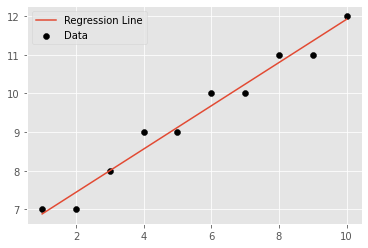

In [71]:
def slope(x, y):
    numerator = x.mean() * y.mean() - (x*y).mean()
    denominator = (x.mean())**2 - (x**2).mean()
    return round(numerator / denominator, 2)

m = slope(X, Y)

def intercept(x, y, slope):
    return y.mean() - slope * x.mean()

c = intercept(X, Y, m)

def best_fit(slope, intercept, x):
    return [x_element * slope + intercept for x_element in x]

y_pred = best_fit(m, c, X)

def r_squared(y, y_hat):
    num = sum([(y1 - y2)**2 for y1, y2 in zip(y, y_hat)])
    y_mean = y.mean()
    denom = sum([(y1 - y_mean)**2 for y1 in y])
    return 1 - (num / denom)

r_sq = r_squared(Y, y_pred)

plt.scatter(X, Y, color = 'k', label = 'Data')
plt.plot(X, best_fit(m, c, X), label = 'Regression Line')
plt.legend()

print('Basic Regression Diangnostics')
print('------------------------------')
print(f'Slope: {m}')
print(f'Y-intercept: {c}')
print(f'R-squared: {r_sq}')
print('------------------------------')
print(f'Model: Y = {m} * x + {c}')

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

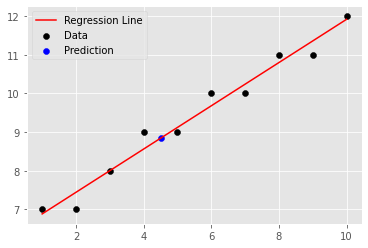

In [72]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x_new = 4.5
y_new = m * x_new + c

plt.scatter(X, Y, color = 'k', label = 'Data')
plt.plot(X, y_pred, color = 'r', label = 'Regression Line')
plt.scatter(x_new, y_new, color = 'b', label = 'Prediction')
plt.legend()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 



In [73]:
import pandas as pd

df = pd.read_csv('heightweight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [74]:
m = slope(df['height'], df['weight'])
c = intercept(df['height'], df['weight'], m)
y_pred = best_fit(m, c, df['height'])
r_sq = r_squared(df['weight'], y_pred)

Basic Regression Diangnostics
------------------------------
Slope: 5.54
Y-intercept: -204.54899999999998
R-squared: 0.9553098989164241
------------------------------
Model: Y = 5.54 * x + -204.54899999999998


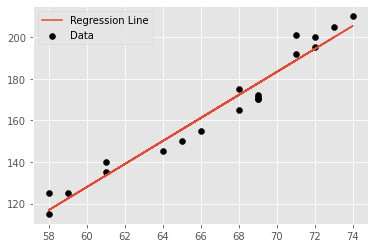

In [75]:
plt.scatter(df['height'], df['weight'], color = 'k', label = 'Data')
plt.plot(df['height'], best_fit(m, c, df['height']), label = 'Regression Line')
plt.legend()

print('Basic Regression Diangnostics')
print('------------------------------')
print(f'Slope: {m}')
print(f'Y-intercept: {c}')
print(f'R-squared: {r_sq}')
print('------------------------------')
print(f'Model: Y = {m} * x + {c}')

Basic Regression Diangnostics
------------------------------
Slope: 5.54
Y-intercept: -204.54899999999998
R-squared: 0.9553098989164241
------------------------------
Model: Y = 5.54 * x + -204.54899999999998


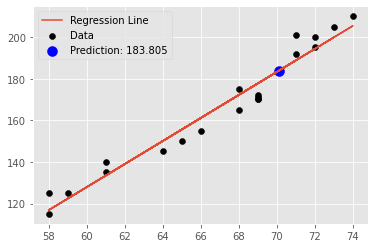

In [76]:
plt.scatter(df['height'], df['weight'], color = 'k', label = 'Data')
plt.plot(df['height'], best_fit(m, c, df['height']), label = 'Regression Line')
plt.scatter(70.1, 70.1 * m + c, color = 'b', label = f'Prediction: {70.1 * m + c}', s = 100)
plt.legend()

print('Basic Regression Diangnostics')
print('------------------------------')
print(f'Slope: {m}')
print(f'Y-intercept: {c}')
print(f'R-squared: {r_sq}')
print('------------------------------')
print(f'Model: Y = {m} * x + {c}')

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 